# Современные методы анализа данных и машинного обучения, БИ

## НИУ ВШЭ, 2024-25 учебный год

## Групповой проект №2. DE: Scraping & API

## Общая информация

__Дата выдачи:__ 21.02.2025

__Защита проекта:__ 05.03.2025

# Код -- запрос: Подарок на 8 марта

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re
from datetime import datetime, timedelta

## Считываем данные и начальная обработка

### Считывание

In [ ]:
ozon = pd.read_csv("ozon_data_z2.csv")
ozon.head()

,product_url,product_name,brand,is_original,final_price,old_price,discount,rating,reviews_count,delivery_time,market
0,/product/originalnaya-elektricheskaya-zubnaya-...,Оригинальная электрическая зубная щётка Oral-B...,Oral-B,True,3839.0,5509.0,−30%,4.9,878.0,За час,OZON
1,/product/merci-konfety-shokoladnye-v-korobke-p...,"Merci, конфеты шоколадные в коробке, подарочны...",NaN,False,352.0,719.0,−51%,4.9,17727.0,За 30 минут,OZON
2,/product/krem-dlya-litsa-i-shei-antivozrastnoy...,Крем для лица и шеи антивозрастной Черный Жемч...,Черный жемчуг,True,448.0,738.0,−39%,4.9,15545.0,За час,OZON
3,/product/stayler-centek-ct-2095-dlya-sozdaniya...,Стайлер Centek CT-2095 для создания идеальных ...,Centek,True,894.0,2699.0,−66%,4.8,1550.0,Завтра,OZON
4,/product/steklyannyy-grafin-dlya-vody-s-kryshk...,"Стеклянный графин для воды с крышкой, кувшин 1...",NaN,False,999.0,1999.0,−50%,4.8,3951.0,Послезавтра,OZON


In [ ]:
simaland = pd.read_csv('simaland_data_z2.csv')
simaland.head()

,product_url,product_name,brand,is_original,final_price,old_price,discount,rating,reviews_count,delivery_time,market
0,/product/podarochnyy-nabor-dlya-zhenshchin-dre...,Подарочный набор для женщин Dream Nature 2шт п...,137 ₽ / шт,False,273.0,499.0,−45%,4.9,37420.0,Завтра,SL
1,/product/sumka-baget-sedlo-na-plecho-iz-ekokoz...,"Сумка-багет, седло, на плечо из экокожи коричн...",NaN,False,469.0,1990.0,−76%,4.7,20.0,Завтра,SL
2,/product/petitfee-patchi-dlya-glaz-gidrogelevy...,PETITFEE Патчи для глаз гидрогелевые Корея охл...,Petitfee,False,864.0,1599.0,−45%,4.9,2380.0,Завтра,SL
3,/product/mileni-massazher-dlya-shei-i-plech-s-...,MILENI Массажер для шеи и плеч с тепловым эффе...,NaN,False,1057.0,9990.0,−89%,4.3,7.0,Послезавтра,SL
4,/product/sumka-zhenskaya-na-plecho-korichnevay...,"Сумка женская на плечо коричневая, сумка кросс...",NaN,False,414.0,2200.0,−81%,4.7,138.0,Завтра,SL


In [ ]:
wb = pd.read_csv('wb_data_z2.csv')
wb.head()

,product_url,product_name,brand,is_original,final_price,old_price,discount,rating,reviews_count,delivery_time,market
0,/product/universalnoe-sredstvo-d-korrektsii-ot...,Универсальное средство д/коррекции отеков и си...,NaN,False,850.0,NaN,NaN,4.7,58.0,Завтра,WB
1,/product/zunyi-smartfon-s24-ultra-rostest-eac-...,ZUNYI Смартфон S24 Ultra Ростест (EAC) 12/512 ...,ZUNYI,False,10194.0,59999.0,−83%,4.4,91.0,6 марта,WB
2,/product/sredstvo-dlya-vosstanovleniya-natural...,Средство для восстановления натурального цвета...,NaN,False,447.0,1433.0,−68%,4.7,3769.0,Завтра,WB
3,/product/krem-syvorotka-v-kapsulah-dlya-litsa-...,"Крем сыворотка в капсулах для лица, глаз и шеи...",NaN,False,151.0,600.0,−74%,4.9,1902.0,Завтра,WB
4,/product/antivozrastnoy-uvlazhnyayushchiy-krem...,Антивозрастной увлажняющий крем для лица с гиа...,Me&My,False,243.0,1200.0,−79%,4.8,2235.0,Завтра,WB


In [ ]:
yandex = pd.read_csv('yandex_market_data_z2.csv')
yandex.head()

,product_url,product_name,brand,is_original,final_price,old_price,discount,rating,reviews_count,delivery_time,market
0,/product/krem-dlya-litsa-penka-dlya-umyvaniya-...,"Крем для лица - Пенка для умывания, Набор косм...",NaN,False,364.0,2300.0,−84%,4.9,281.0,8 марта,YDX
1,/product/celine-paris-sergi-1654055824/?_bctx=...,Celine Paris Серьги,NaN,False,995.0,4900.0,−79%,5.0,4.0,Послезавтра,YDX
2,/product/silk-tverdoe-mylo-1659438986/?_bctx=C...,Silk Твердое мыло,NaN,False,322.0,1265.0,−74%,4.9,1360.0,6 марта,YDX
3,/product/concept-professionalnyy-nabor-shampun...,Concept Профессиональный набор Шампунь и Конди...,NaN,False,584.0,1154.0,−49%,4.9,1863.0,Завтра,YDX
4,/product/podvodka-dlya-glaz-korichnevaya-vodos...,Подводка для глаз коричневая водостойкая Water...,NaN,False,189.0,1026.0,−81%,4.8,1087.0,Завтра,YDX


In [ ]:
data_z2 = pd.concat([ozon, simaland, wb, yandex], axis=0, ignore_index=True)
data_z2.head()

,product_url,product_name,brand,is_original,final_price,old_price,discount,rating,reviews_count,delivery_time,market
0,/product/originalnaya-elektricheskaya-zubnaya-...,Оригинальная электрическая зубная щётка Oral-B...,Oral-B,True,3839.0,5509.0,−30%,4.9,878.0,За час,OZON
1,/product/merci-konfety-shokoladnye-v-korobke-p...,"Merci, конфеты шоколадные в коробке, подарочны...",NaN,False,352.0,719.0,−51%,4.9,17727.0,За 30 минут,OZON
2,/product/krem-dlya-litsa-i-shei-antivozrastnoy...,Крем для лица и шеи антивозрастной Черный Жемч...,Черный жемчуг,True,448.0,738.0,−39%,4.9,15545.0,За час,OZON
3,/product/stayler-centek-ct-2095-dlya-sozdaniya...,Стайлер Centek CT-2095 для создания идеальных ...,Centek,True,894.0,2699.0,−66%,4.8,1550.0,Завтра,OZON
4,/product/steklyannyy-grafin-dlya-vody-s-kryshk...,"Стеклянный графин для воды с крышкой, кувшин 1...",NaN,False,999.0,1999.0,−50%,4.8,3951.0,Послезавтра,OZON


**Удалим колонку product_url**

In [ ]:
del data_z2['product_url']

In [ ]:
data_z2.head()

,product_name,brand,is_original,final_price,old_price,discount,rating,reviews_count,delivery_time,market
0,Оригинальная электрическая зубная щётка Oral-B...,Oral-B,True,3839.0,5509.0,−30%,4.9,878.0,За час,OZON
1,"Merci, конфеты шоколадные в коробке, подарочны...",NaN,False,352.0,719.0,−51%,4.9,17727.0,За 30 минут,OZON
2,Крем для лица и шеи антивозрастной Черный Жемч...,Черный жемчуг,True,448.0,738.0,−39%,4.9,15545.0,За час,OZON
3,Стайлер Centek CT-2095 для создания идеальных ...,Centek,True,894.0,2699.0,−66%,4.8,1550.0,Завтра,OZON
4,"Стеклянный графин для воды с крышкой, кувшин 1...",NaN,False,999.0,1999.0,−50%,4.8,3951.0,Послезавтра,OZON


In [ ]:
data_z2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10294 entries, 0 to 10293
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_name   10294 non-null  object 
 1   brand          2627 non-null   object 
 2   is_original    10294 non-null  bool   
 3   final_price    10264 non-null  float64
 4   old_price      10246 non-null  float64
 5   discount       10246 non-null  object 
 6   rating         9900 non-null   float64
 7   reviews_count  9900 non-null   float64
 8   delivery_time  10294 non-null  object 
 9   market         10294 non-null  object 
dtypes: bool(1), float64(4), object(5)
memory usage: 734.0+ KB


In [ ]:
# смотрим размер таблицы
data_z2.shape

(10294, 10)

### Работа с дубликатами

In [ ]:
data_z2.duplicated().sum()

1384

In [ ]:
data_z2 = data_z2.drop_duplicates()

### Работа с пропусками

**Для начала отсортируем нашу ценовую категорию (700 - 2000 рублей)**

In [ ]:
data_z2_start = data_z2.copy()

In [ ]:
data_z2 = data_z2[(data_z2["final_price"] >= 700) & (data_z2["final_price"] <= 2000)]
data_z2.shape[0]

2461

In [ ]:
print('Доля товаров нашей ценовой категории', data_z2.shape[0] / data_z2_start.shape[0])

Доля товаров нашей ценовой категории 0.2762065095398429


In [ ]:
data_z2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2461 entries, 3 to 10290
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_name   2461 non-null   object 
 1   brand          666 non-null    object 
 2   is_original    2461 non-null   bool   
 3   final_price    2461 non-null   float64
 4   old_price      2454 non-null   float64
 5   discount       2454 non-null   object 
 6   rating         2411 non-null   float64
 7   reviews_count  2411 non-null   float64
 8   delivery_time  2461 non-null   object 
 9   market         2461 non-null   object 
dtypes: bool(1), float64(4), object(5)
memory usage: 194.7+ KB


**Можно увидеть, что пропуски в большом обьеме есть в колонке -- бренды. Также есть пропуски в колонках old price, final price, old price, еще есть пропуски в rating и reviews counts**

In [ ]:
data_z2.isnull().sum()

,0
product_name,0
brand,1795
is_original,0
final_price,0
old_price,7
discount,7
rating,50
reviews_count,50
delivery_time,0
market,0


**final_price, old_price и discount**


Так как мало пропусков в столцах final_price, old_price и discount (и скорее всего, это одна и та же строка) - можем их убрать. Наиболбшее количество пропусков - в значении бренда, поэтому попробуем заполнить эти пропуски на основе столбца с названием товара, используя проверки на наличие английских слов.

In [ ]:
data_z2 = data_z2.dropna(subset=['final_price','old_price', 'discount'])

**brand**

In [ ]:
def extract_brand(product_name):
    eng_words = re.findall(r'[A-Za-z]+', product_name)
    return ' '.join(eng_words) if eng_words else None

In [ ]:
data_z2.loc[data_z2["brand"].isna(), "brand"] = data_z2["product_name"].apply(extract_brand)
data_z2.head()

,product_name,brand,is_original,final_price,old_price,discount,rating,reviews_count,delivery_time,market
3,Стайлер Centek CT-2095 для создания идеальных ...,Centek,True,894.0,2699.0,−66%,4.8,1550.0,Завтра,OZON
4,"Стеклянный графин для воды с крышкой, кувшин 1...",None,False,999.0,1999.0,−50%,4.8,3951.0,Послезавтра,OZON
6,Venus для зоны бикини сменные кассеты 4 шт,Venus,True,1689.0,2515.0,−32%,4.9,3917.0,За 2 часа,OZON
8,Серебряное кольцо женское 925 пробы с камнями ...,SOKOLOV,True,920.0,5790.0,−84%,4.9,4057.0,Завтра,OZON
10,ARAVIA Laboratories Увлажняющая сыворотка с ги...,ARAVIA Laboratories,True,820.0,998.0,−17%,4.8,11647.0,За 30 минут,OZON


In [ ]:
data_z2.isnull().sum()

,0
product_name,0
brand,569
is_original,0
final_price,0
old_price,0
discount,0
rating,50
reviews_count,50
delivery_time,0
market,0


После проделанных операция у нас нет больше пропусков в столбцах final_price, old_price и discount, а также сократилось число пропусков в столбце brand

**rating и reviews_count**

заполним пропуски 0, так как если не указывается количество отзывов, значит отзывов слишком мало или их нет

In [ ]:
data_z2['rating'].isna().sum()

50

In [ ]:
data_z2[data_z2['rating'].isna()].head()

,product_name,brand,is_original,final_price,old_price,discount,rating,reviews_count,delivery_time,market
483,"Скраб для лица, пенка для умывания, Гималайска...",Sadoer,False,700.0,3320.0,−78%,NaN,NaN,Завтра,OZON
982,"Neutrogena Шампунь для волос, 200.0 мл",Neutrogena,False,1542.0,2384.0,−35%,NaN,NaN,22 марта,OZON
1288,Комплект одежды Zara,Zara,False,1896.0,7888.0,−75%,NaN,NaN,19 марта,OZON
1679,LIBERTY Серьги ювелирные Серебро 925 пробы,LIBERTY,False,1010.0,5990.0,−83%,NaN,NaN,8 марта,OZON
2669,ALAIA Сумка на плечо,ALAIA,False,774.0,5000.0,−84%,NaN,NaN,8 марта,OZON


In [ ]:
data_z2['rating'] = data_z2['rating'].fillna(0)
data_z2['reviews_count'] = data_z2['reviews_count'].fillna(0)
data_z2.isna().sum()

,0
product_name,0
brand,569
is_original,0
final_price,0
old_price,0
discount,0
rating,0
reviews_count,0
delivery_time,0
market,0


## Сравнение маркетплейсов

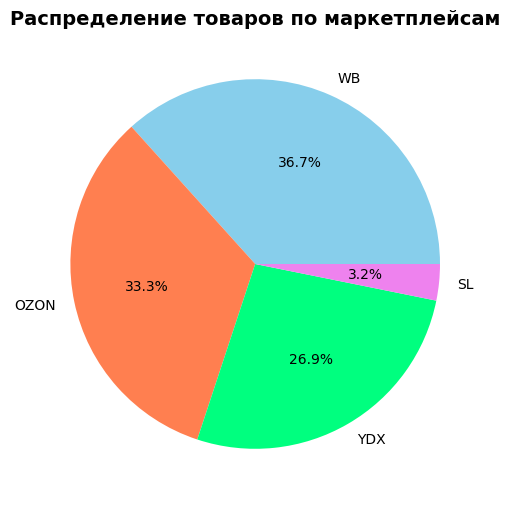

In [ ]:
plt.figure(figsize=(12, 6))

market_counts = data_z2['market'].value_counts()

plt.pie(market_counts, labels=market_counts.index, autopct="%1.1f%%", colors=['skyblue', 'coral', 'springgreen', 'violet'])
plt.title('Распределение товаров по маркетплейсам', fontweight='bold', fontsize=14)
plt.show()

''

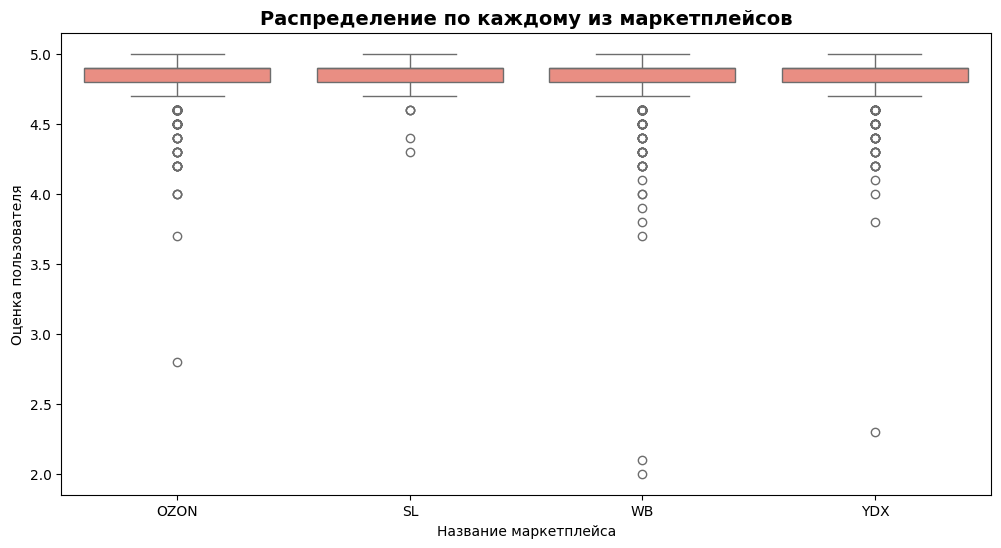

In [ ]:
# бокс плот по маркетплейсам
plt.figure(figsize=(12, 6))
sns.boxplot(x='market', y='rating', data= data_z2[data_z2['rating'] > 0], color='salmon')
plt.title('Распределение по каждому из маркетплейсов', fontweight='bold', fontsize=14)
plt.xlabel('Название маркетплейса')
plt.ylabel('Оценка пользователя')
;

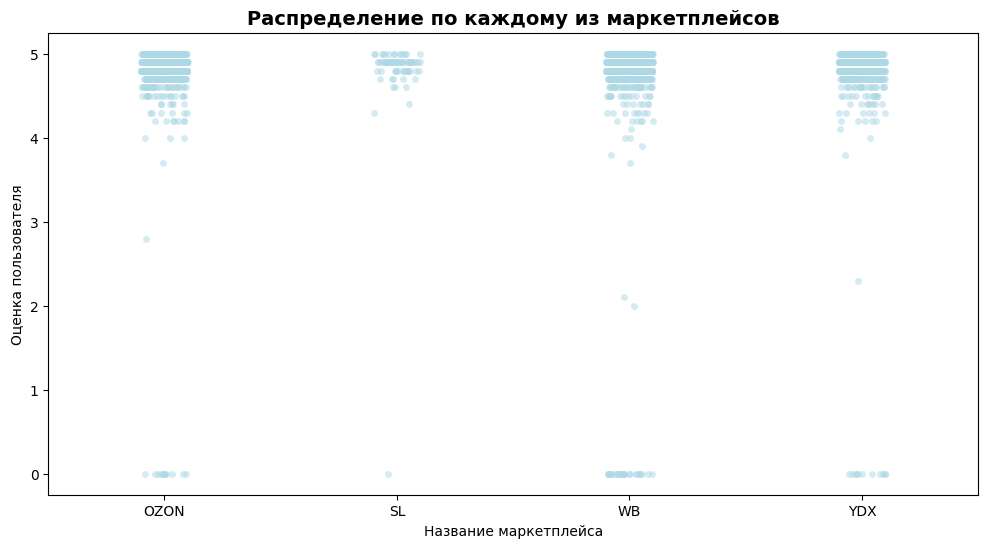

In [ ]:
plt.figure(figsize=(12, 6))
sns.stripplot(x='market', y='rating', data=data_z2, color='lightblue', alpha=0.5, jitter=True)
plt.title('Распределение по каждому из маркетплейсов', fontweight='bold', fontsize=14)
plt.xlabel('Название маркетплейса')
plt.ylabel('Оценка пользователя')
plt.show()

Результат как и при предыдущих запросах, только в данном случае большую долю занимает вб, а не озон. Оценки также пользователи продалжают в основном положительные от 4.7 - 5.0, но в этот раз распределение не такое категоричное, так как присутсвует большое количество отзывов чуть ниже, в диапазоне от 4.1 - 4.7

## Процент браслетов на рынке

In [ ]:
braslets1 = data_z2_start[data_z2_start['product_name'].apply(lambda x: "браслет" in str(x))]
braslets = data_z2[data_z2['product_name'].apply(lambda x: "браслет" in str(x))]
print('Всего браслетов', braslets1.shape)
print('Браслетов нашей ценовой категории', braslets.shape)

Всего браслетов (21, 10)
Браслетов нашей ценовой категории (1, 10)


<ipython-input-94-f107cd23d1be>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_labels, y=category_values, palette=['royalblue', 'gold', 'lightblue'])


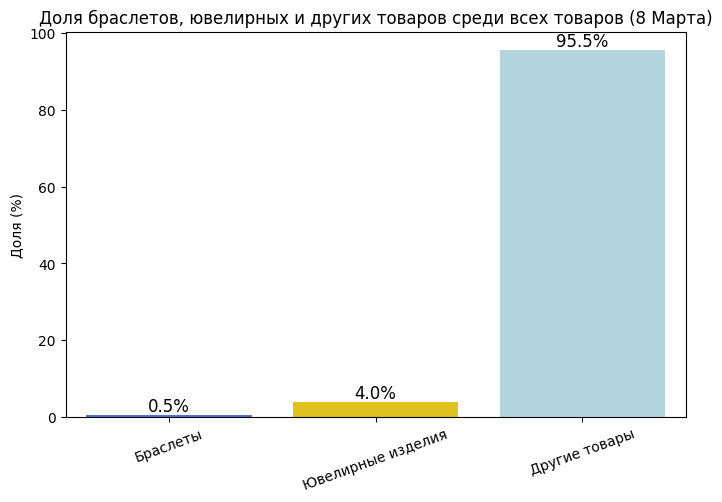

In [ ]:
bracelets_df = data_z2_start[data_z2_start['product_name'].str.contains("браслет|bracelet", case=False, na=False)]
bracelet_ratio = len(bracelets_df) / len(data_z2_start) * 100


jewelry_df = data_z2_start[data_z2_start['product_name'].str.contains("кольцо|серебро|золото|цепочка|подвеска|серьги|ювелир", case=False, na=False)]
jewelry_ratio = len(jewelry_df) / len(data_z2_start) * 100

bracelets_df1 = data_z2[data_z2['product_name'].str.contains("браслет|bracelet", case=False, na=False)]
bracelet_ratio1 = len(bracelets_df1) / len(data_z2) * 100


jewelry_df1 = data_z2[data_z2['product_name'].str.contains("кольцо|серебро|золото|цепочка|подвеска|серьги|ювелир", case=False, na=False)]
jewelry_ratio1 = len(jewelry_df1) / len(data_z2) * 100

# График: Доля браслетов и ювелирных изделий среди всех товаров
category_labels = ['Браслеты', 'Ювелирные изделия', 'Другие товары']
category_values = [bracelet_ratio, jewelry_ratio, 100 - bracelet_ratio - jewelry_ratio]
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=category_labels, y=category_values, palette=['royalblue', 'gold', 'lightblue'])
plt.ylabel("Доля (%)")
plt.title("Доля браслетов, ювелирных и других товаров среди всех товаров (8 Марта)")
plt.xticks(rotation=20)
for i, v in enumerate(category_values):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=12)

plt.show()

<ipython-input-96-ceaf4571c304>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=category_labels, y=category_values, palette=['royalblue', 'gold', 'lightblue'])


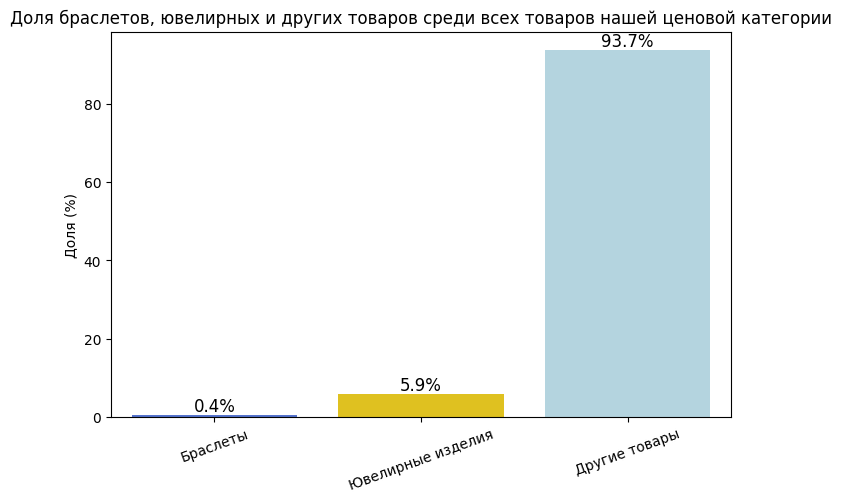

In [ ]:
# График: Доля браслетов и ювелирных изделий среди всех товаров нашей ценовой категории
category_labels = ['Браслеты', 'Ювелирные изделия', 'Другие товары']
category_values = [bracelet_ratio1, jewelry_ratio1, 100 - bracelet_ratio1 - jewelry_ratio1]
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=category_labels, y=category_values, palette=['royalblue', 'gold', 'lightblue'])
plt.ylabel("Доля (%)")
plt.title("Доля браслетов, ювелирных и других товаров среди всех товаров нашей ценовой категории")
plt.xticks(rotation=20)
for i, v in enumerate(category_values):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=12)

plt.show()

При рассматривании браслетов как потенциальный товар для подарков на 8 Марта, стоит учитывать, что они не являются популярным выбором(в любой ценовой категории), как и в целом ювелирные украшения. Видимо данный вид товара не является особо популярным в качестве подарка на 8 марта